# Project 1: SAT & ACT Analysis

By Jovita Pinto


## Problem Statement

The SAT test is a college admission exam which is now being mandated nationwide across the United States. The ACT test is a direct competitor of the SAT and has also been used extensively. This project compares exam scores and participation rates for both ACT and SAT for the years 2017 and 2018.Recommendations are also provided to boost SAT participation rates nation wide particularly in states with low participation rates like Oklahoma.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [9]:
#Imports:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [10]:
#Code:
sat_2017=pd.read_csv('../data/sat_2017.csv')
act_2017=pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [11]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [12]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [13]:
act_2017.shape

(52, 7)

In [14]:
sat_2017.shape

(51, 5)

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

The SAT and ACT 2017 datasets provide scores and participation rates for states in USA.The ACT 2017 data set has an extra row stating the national scores.The scores are scaled results and not raw scores. 

#### 4a. Does the data look complete? 

In [15]:
sat_2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [16]:
act_2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

Answer: After conducting a null check, looks like the data is complete

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [17]:
#SAT 2017 Min values
sat_2017.min()

State                                 Alabama
Participation                             10%
Evidence-Based Reading and Writing        482
Math                                       52
Total                                     950
dtype: object

In [18]:
#SAT 2017 Max values
sat_2017.max()

State                                 Wyoming
Participation                             96%
Evidence-Based Reading and Writing        644
Math                                      651
Total                                    1295
dtype: object

#ACT 2017 Min Values
act_2017.min()

In [19]:
#ACT 2017 Max Values
act_2017.max()

State            Wyoming
Participation        98%
English             25.5
Math                25.3
Reading               26
Science             24.9
Composite           25.5
dtype: object

Upon comparison, SAT 2017 Math has a low of 52 and ACT 2017 Science has a low of 2.3.These numbers need to be corrected before any futher analysis is conducted

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

#### 5. What are your data types? 
Display the data types of each feature. 

In [20]:
#code
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [21]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

Participation column in sat_2017 dataframe should be converted into floats by removing '%' sign in order to be used for further calculations.

Participation and Composite columns in act_2017 dataframe should be converted into floats as it contains numerical values and can be used for calculations further in the project.




#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [22]:
#code
def covert_percent_to_float(dataframe,column):
    dataframe[column]=dataframe[column].str.replace('%','')
    dataframe[column]=(dataframe[column].apply(float))/100


In [23]:
covert_percent_to_float(sat_2017,"Participation")
covert_percent_to_float(act_2017,"Participation")


- Fix any individual values preventing other columns from being the appropriate type.

In [24]:
#code
np.sort(act_2017['Composite'].unique())


array(['17.8', '18.6', '18.7', '19.0', '19.1', '19.2', '19.4', '19.5',
       '19.7', '19.8', '20.0', '20.2x', '20.3', '20.4', '20.5', '20.7',
       '20.8', '21.0', '21.4', '21.5', '21.7', '21.8', '21.9', '22.0',
       '22.3', '22.6', '22.8', '23.6', '23.7', '23.8', '23.9', '24.0',
       '24.1', '24.2', '24.3', '25.2', '25.4', '25.5'], dtype=object)

In [25]:
act_2017['Composite'] = act_2017['Composite'].str.replace('x', '')
act_2017['Composite']=act_2017['Composite'].apply(float) 

- Finish your data modifications by making sure the columns are now typed appropriately.

In [26]:
#code
#sat_2017.head(10)
np.sort(act_2017['State'].unique())

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'National', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [27]:
#act_2017.head(10)
np.sort(sat_2017['State'].unique())

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

- Display the data types again to confirm they are correct.

In [28]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [29]:
#Code:
act_2017.dtypes


State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [30]:
#Extracting the state where sat_math is 52
sat_2017[sat_2017['Math']==52]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,0.69,536,52,1060


In [31]:
#Replacing the sat_math value for Maryland with 524(1060-536)
sat_2017.loc[20,'Math']=524

In [32]:
#Check if it updated
sat_2017.loc[20,:]

State                                 Maryland
Participation                             0.69
Evidence-Based Reading and Writing         536
Math                                       524
Total                                     1060
Name: 20, dtype: object

In [33]:
#Extracting the state where act_science is 2.3
act_2017[act_2017['Science'] == 2.3]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,0.28,23.3,23.1,24.2,2.3,23.6


In [34]:
#Replacing the act_science value for Maryland with 23.8(average(act_scores)=composite)
act_2017.loc[21,'Science']=23.8

In [35]:
#Check if it updated
act_2017.loc[21,:]

State            Maryland
Participation        0.28
English              23.3
Math                 23.1
Reading              24.2
Science              23.8
Composite            23.6
Name: 21, dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [36]:
#code
act_2017.rename(columns = {"State": "state",
                           "Participation": "act_2017_participation_%",
                           "English":"act_2017_english",
                           "Math": "act_2017_math",
                           "Reading": "act_2017_reading",
                           "Science": "act_2017_science",
                           "Composite": "act_2017_composite"
                          }, inplace = True)
sat_2017.rename(columns = {"State": "state",
                           "Participation": "sat_2017_participation_%",
                           "Evidence-Based Reading and Writing":"sat_2017_read_write",
                           "Math":"sat_2017_math",
                           "Total":"sat_2017_total"
                          }, inplace = True)

In [37]:
act_2017.head(1)

,state,act_2017_participation_%,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,National,0.6,20.3,20.7,21.4,21.0,21.0


In [38]:
sat_2017.head(1)

,state,sat_2017_participation_%,sat_2017_read_write,sat_2017_math,sat_2017_total
0,Alabama,0.05,593,572,1165


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|ACT(2017,2018)SAT(2017,2018)|USA state where SAT or ACT testing took place| 
|**participation_%**|*float*|ACT(2017,2018)SAT(2017,2018)|percentage of graduating high school seniors being tested|
|**act_english**|*float*|ACT(2017,2018)|ACT English scaled score between 1 and 36|
|**act_math**|*float*|ACT(2017,2018)|ACT Math scaled score between 1 and 36|
|**act_read**|*float*|ACT(2017,2018)|ACT Reading scaled score between 1 and 36|
|**act_science**|*float*|ACT(2017,2018)|ACT Science scaled score between 1 and 36|
|**act_composite**|*float*|ACT(2017,2018)|Average of 4 ACT scaled scores between 1 and 36|
|**sat_read_write**|*int*|SAT(2017,2018)|SAT Evidence Based Reading and Writing(EBRW) scaled score between 200 and 800|
|**sat_math**|*int*|SAT(2017,2018)|SAT Math scaled scores between 200 and 800|
|**sat_total**|*int*|SAT(2017,2018)|Sum of SAT EBRW and Math scaled scores between 400 and 1600|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [39]:
#ACT_2017 has an extra row 
act_2017.drop(0, inplace = True, axis = 0)

In [40]:
act_2017.index = np.arange(0,len(act_2017["state"]))

In [41]:
act_2017.shape

(51, 7)

In [42]:
sat_2017.shape

(51, 5)

In [43]:
sat_2017.head(1)

,state,sat_2017_participation_%,sat_2017_read_write,sat_2017_math,sat_2017_total
0,Alabama,0.05,593,572,1165


In [44]:
act_2017.head(1)

,state,act_2017_participation_%,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,Alabama,1.0,18.9,18.4,19.7,19.4,19.2


#### Summary of 2017 Data Set changes
- ACT 2017 Science for Maryland was corrected
- SAT 2017 Math for Maryland was corrected
- Participation values were converted to floats
- ACT 2017 composite incorrect values were corrected and converted to floats
- Column names were changed to cleaner format
- National row in ACT 2017 was dropped and indices were fixed.

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [45]:
#Code:
combined_2017=pd.merge(left=act_2017,right=sat_2017,on="state",how='outer')

In [46]:
combined_2017.head(5)

,state,act_2017_participation_%,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation_%,sat_2017_read_write,sat_2017_math,sat_2017_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [48]:
#code
combined_2017.to_csv('../data/combined_2017.csv',sep=",",index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [49]:
#Reading in files
sat_2018=pd.read_csv('../data/sat_2018.csv')
act_2018=pd.read_csv('../data/act_2018.csv')

In [50]:
#Checking the states for consistancy
np.sort(sat_2018['State'].unique())

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [51]:
#Checking the states for consistancy
np.sort(act_2018['State'].unique())


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [52]:
#Converting 'District of columbia' to 'District of Columbia'
act_2018.loc[8,["State"]] = "District of Columbia"

In [53]:
#Verifying change of name 
np.sort(act_2018['State'].unique())

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [54]:
#Checking the count of rows in act_2018
act_2018.shape

(52, 3)

In [55]:
#Checking the count of rows in sat_2018
sat_2018.shape

(51, 5)

In [56]:
#SAT 2018 Index check
sat_2018.loc[35]

State                                 Oklahoma
Participation                               8%
Evidence-Based Reading and Writing         541
Math                                       521
Total                                     1062
Name: 35, dtype: object

In [57]:
sat_2018.loc[36]

State                                 Ohio
Participation                          18%
Evidence-Based Reading and Writing     552
Math                                   547
Total                                 1099
Name: 36, dtype: object

In [58]:
#Swapping Oklahoma and Ohio positions
sat_2018.iloc[35]=['Ohio','18%',552,547,1099]
sat_2018.iloc[36]=['Oklahoma','8%',541,521,1062]

In [59]:
sat_2018

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,56%,550,549,1099


In [60]:
act_2018.head(50)

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7
5,Colorado,30%,23.9
6,Connecticut,26%,25.6
7,Delaware,17%,23.8
8,District of Columbia,32%,23.6
9,Florida,66%,19.9


In [61]:
#Maine in act_2018 is duplicated so one row has to be removed
act_2018.drop(19,inplace=True,axis=0)


In [62]:
#Verifing the row count is correct
act_2018.shape

(51, 3)

In [63]:
#Fix the index of the act_2018 rows
act_2018.index=np.arange(0,len(act_2018['State']))

In [64]:
act_2018.head(51)

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7
5,Colorado,30%,23.9
6,Connecticut,26%,25.6
7,Delaware,17%,23.8
8,District of Columbia,32%,23.6
9,Florida,66%,19.9


In [65]:
#Checking data types
act_2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [66]:
#Checking data types
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [67]:
#converting participation into floats
covert_percent_to_float(sat_2018,"Participation")
covert_percent_to_float(act_2018,"Participation")

In [68]:
#Verifying datatypes
sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [69]:
#Verifying datatypes
act_2018.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

In [70]:
#Renaming sat_2018 and act_2018  headings
act_2018.rename(columns = {"State": "state",
                           "Participation": "act_2018_participation_%",
                           "Composite": "act_2018_composite"
                          }, inplace = True)

In [71]:
sat_2018.rename(columns = {"State": "state",
                           "Participation": "sat_2018_participation_%",
                           "Evidence-Based Reading and Writing":"sat_2018_read_write",
                           "Math":"sat_2018_math",
                           "Total":"sat_2018_total"
                          }, inplace = True)

In [72]:
#Verifying headings
sat_2018.head()

,state,sat_2018_participation_%,sat_2018_read_write,sat_2018_math,sat_2018_total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [73]:
#Verifying headings
act_2018.head()

,state,act_2018_participation_%,act_2018_composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


#### Summary of 2018 Data Set changes
- ACT 2018 District of Columbia was updated
- ACT 2018 extra 'Maine' row was dropped and indices were fixed.
- Participation values were converted to floats
- Oklahoma and Ohio were switched to follow proper alphabetical order
- Column names were changed to cleaner format

In [74]:
#Combining the two datasets
combined_2018=pd.merge(left=act_2018,right=sat_2018,on="state",how='outer')

In [75]:
#Exporting the combined 2018 csv
combined_2018.to_csv('../data/combined_2018.csv',sep=",",index=False)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [95]:
#Combined final dataframe
final=pd.merge(left=combined_2017,right=combined_2018,on="state",how='outer')

In [96]:
final.head()

,state,act_2017_participation_%,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation_%,sat_2017_read_write,sat_2017_math,sat_2017_total,act_2018_participation_%,act_2018_composite,sat_2018_participation_%,sat_2018_read_write,sat_2018_math,sat_2018_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,0.33,20.8,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,1.00,19.4,0.05,592,576,1169
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055,0.27,22.7,0.60,540,536,1076


In [97]:
#Exporting the combined 2018 csv
final.to_csv('../data/final.csv',sep=",",index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [98]:
#Code:
final.describe().T


,count,mean,std,min,25%,50%,75%,max
act_2017_participation_%,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_2017_english,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_2017_math,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_2017_reading,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_2017_science,51.0,21.462745,1.753392,18.20,19.950,21.30,23.200,24.9
act_2017_composite,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5
sat_2017_participation_%,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_2017_read_write,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_2017_math,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


In [99]:
#Standard deviation
final.std().T

act_2017_participation_%     0.321408
act_2017_english             2.353677
act_2017_math                1.981989
act_2017_reading             2.067271
act_2017_science             1.753392
act_2017_composite           2.020695
sat_2017_participation_%     0.352766
sat_2017_read_write         45.666901
sat_2017_math               47.121395
sat_2017_total              92.494812
act_2018_participation_%     0.340371
act_2018_composite           2.111583
sat_2018_participation_%     0.373143
sat_2018_read_write         47.502627
sat_2018_math               47.772623
sat_2018_total              94.155083
dtype: float64

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [100]:
#code
def standard_deviation(column):
    mean=column.mean()
    sample_var=sum([(i-mean)**2 for i in column])/len(column)
    return np.sqrt(sample_var)
   

In [101]:
#checking the std dev function
standard_deviation(final['sat_2017_math'])

46.65713364485503

In [102]:
final.shape
final.head()

,state,act_2017_participation_%,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation_%,sat_2017_read_write,sat_2017_math,sat_2017_total,act_2018_participation_%,act_2018_composite,sat_2018_participation_%,sat_2018_read_write,sat_2018_math,sat_2018_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,0.33,20.8,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,1.00,19.4,0.05,592,576,1169
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055,0.27,22.7,0.60,540,536,1076


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [103]:
#Code:
std_dev_dict={i:standard_deviation(final[i]) for i in final.columns.tolist() if i!='state'}

In [104]:
std_dev_dict

{'act_2017_participation_%': 0.3182417575123181,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 1.7361170088327353,
 'act_2017_composite': 2.000786081581989,
 'sat_2017_participation_%': 0.3492907076664507,
 'sat_2017_read_write': 45.21697020437866,
 'sat_2017_math': 46.65713364485503,
 'sat_2017_total': 91.58351056778743,
 'act_2018_participation_%': 0.33701735820410317,
 'act_2018_composite': 2.090779082141178,
 'sat_2018_participation_%': 0.3694661922353942,
 'sat_2018_read_write': 47.03460978357609,
 'sat_2018_math': 47.30194550378352,
 'sat_2018_total': 93.22742384464433}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [161]:
#Calculating standard deviation using numpy's std method
std_dev_numpy=list(np.std(final[i]) for i in final.columns.tolist() if i!='state')
std_dev_numpy


[0.3182417575123181,
 2.3304876369363363,
 1.9624620273436781,
 2.0469029314842646,
 1.7361170088327353,
 2.000786081581989,
 0.3492907076664507,
 45.21697020437866,
 46.65713364485503,
 91.58351056778743,
 0.33701735820410317,
 2.090779082141178,
 0.3694661922353942,
 47.03460978357609,
 47.30194550378352,
 93.22742384464433,
 0.18091718140701388,
 0.13324535736570928]

-The function calculated standard deviation values vary about **1%** from the standard deviation derived from **pandas** describe method. 

-The function calculated standard deviation values match  the standard deviation derived from **numpy** std method. 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [107]:
#code
#Lowest Participation rates-SAT 2017
print(sat_2017.loc[:,['state','sat_2017_participation_%','sat_2017_total']].sort_values('sat_2017_participation_%',ascending=True).head(30))
#Lowest Participation rates-SAT 201
print(sat_2018.loc[:,['state','sat_2018_participation_%','sat_2018_total']].sort_values('sat_2018_participation_%',ascending=True).head(30))
#Lowest Participation rates-ACT 2017
print(act_2017.loc[:,['state','act_2017_participation_%','act_2017_composite']].sort_values('act_2017_participation_%',ascending=True).head(10))
#Lowest Participation rates-ACT 2018
print(act_2018.loc[:,['state','act_2018_participation_%','act_2018_composite']].sort_values('act_2018_participation_%',ascending=True).head(15))

             state  sat_2017_participation_%  sat_2017_total
34    North Dakota                      0.02            1256
24     Mississippi                      0.02            1242
15            Iowa                      0.02            1275
25        Missouri                      0.03            1271
44            Utah                      0.03            1238
41    South Dakota                      0.03            1216
27        Nebraska                      0.03            1253
49       Wisconsin                      0.03            1291
23       Minnesota                      0.03            1295
50         Wyoming                      0.03            1230
3         Arkansas                      0.03            1208
16          Kansas                      0.04            1260
17        Kentucky                      0.04            1247
18       Louisiana                      0.04            1198
0          Alabama                      0.05            1165
42       Tennessee      

In [108]:
#code
#Highest Participation rates-SAT 2017
print(sat_2017.loc[:,['state','sat_2017_participation_%','sat_2017_total']].sort_values('sat_2017_participation_%',ascending=False).head(10))
#Highest Participation rates-SAT 201
print(sat_2018.loc[:,['state','sat_2018_participation_%','sat_2018_total']].sort_values('sat_2018_participation_%',ascending=False).head(10))
#Highest Participation rates-ACT 2017
print(act_2017.loc[:,['state','act_2017_participation_%','act_2017_composite']].sort_values('act_2017_participation_%',ascending=False).head(20))
#Highest Participation rates-ACT 2018
print(act_2018.loc[:,['state','act_2018_participation_%','act_2018_composite']].sort_values('act_2018_participation_%',ascending=False).head(20))

                   state  sat_2017_participation_%  sat_2017_total
8   District of Columbia                      1.00             950
22              Michigan                      1.00            1005
6            Connecticut                      1.00            1041
7               Delaware                      1.00             996
29         New Hampshire                      0.96            1052
19                 Maine                      0.95            1012
12                 Idaho                      0.93            1005
9                Florida                      0.83            1017
21         Massachusetts                      0.76            1107
39          Rhode Island                      0.71            1062
                   state  sat_2018_participation_%  sat_2018_total
5               Colorado                      1.00            1025
6            Connecticut                      1.00            1053
7               Delaware                      1.00            

In [109]:
#Lowest Composite/Total scores-SAT 2017
print(sat_2017.loc[:,['state','sat_2017_participation_%','sat_2017_total']].sort_values('sat_2017_total',ascending=True).head(10))
#Lowest Composite/Total scores-SAT 201
print(sat_2018.loc[:,['state','sat_2018_participation_%','sat_2018_total']].sort_values('sat_2018_total',ascending=True).head(10))
#Lowest Composite/Total scores-ACT 2017
print(act_2017.loc[:,['state','act_2017_participation_%','act_2017_composite']].sort_values('act_2017_composite',ascending=True).head(10))
#Lowest Composite/Total scores-ACT 2018
print(act_2018.loc[:,['state','act_2018_participation_%','act_2018_composite']].sort_values('act_2018_composite',ascending=True).head(10))

                   state  sat_2017_participation_%  sat_2017_total
8   District of Columbia                      1.00             950
7               Delaware                      1.00             996
12                 Idaho                      0.93            1005
22              Michigan                      1.00            1005
19                 Maine                      0.95            1012
9                Florida                      0.83            1017
43                 Texas                      0.62            1020
6            Connecticut                      1.00            1041
36              Oklahoma                      0.07            1047
10               Georgia                      0.61            1050
                   state  sat_2018_participation_%  sat_2018_total
8   District of Columbia                      0.92             977
7               Delaware                      1.00             998
48         West Virginia                      0.28            

In [110]:
#Highest Composite/Total scores-SAT 2017
print(sat_2017.loc[:,['state','sat_2017_participation_%','sat_2017_total']].sort_values('sat_2017_total',ascending=False).head(10))
#Highest Composite/Total scores-SAT 201
print(sat_2018.loc[:,['state','sat_2018_participation_%','sat_2018_total']].sort_values('sat_2018_total',ascending=False).head(10))
#Highest Composite/Total scores-ACT 2017
print(act_2017.loc[:,['state','act_2017_participation_%','act_2017_composite']].sort_values('act_2017_composite',ascending=False).head(10))
#Highest Composite/Total scores-ACT 2018
print(act_2018.loc[:,['state','act_2018_participation_%','act_2018_composite']].sort_values('act_2018_composite',ascending=False).head(10))

           state  sat_2017_participation_%  sat_2017_total
23     Minnesota                      0.03            1295
49     Wisconsin                      0.03            1291
15          Iowa                      0.02            1275
25      Missouri                      0.03            1271
16        Kansas                      0.04            1260
34  North Dakota                      0.02            1256
27      Nebraska                      0.03            1253
17      Kentucky                      0.04            1247
24   Mississippi                      0.02            1242
44          Utah                      0.03            1238
           state  sat_2018_participation_%  sat_2018_total
23     Minnesota                      0.04            1298
49     Wisconsin                      0.03            1294
34  North Dakota                      0.02            1283
15          Iowa                      0.03            1265
16        Kansas                      0.04            12

In [111]:
#Do any states with 100% participation on a given test have a rate change year-to-year?
#Rate change from 2017 to 2018
final['change_in_sat_par']=final['sat_2018_participation_%']-final['sat_2017_participation_%']

In [112]:
final['change_in_act_par']=final['act_2018_participation_%']-final['act_2017_participation_%']

In [113]:
#100 % Participation rate masks for SAT and ACT 
mask_sat_part=(final['sat_2017_participation_%']==1.0)|(final['sat_2018_participation_%']==1.0)

In [114]:
mask_act_part=(final['act_2017_participation_%']==1.0)|(final['act_2018_participation_%']==1.0)

In [115]:
final[mask_sat_part][['state','sat_2017_participation_%','sat_2018_participation_%','change_in_sat_par']]

,state,sat_2017_participation_%,sat_2018_participation_%,change_in_sat_par
5,Colorado,0.11,1.00,0.89
6,Connecticut,1.00,1.00,0.00
7,Delaware,1.00,1.00,0.00
8,District of Columbia,1.00,0.92,-0.08
12,Idaho,0.93,1.00,0.07
22,Michigan,1.00,1.00,0.00


In [116]:
final[mask_act_part][['state','act_2017_participation_%','act_2018_participation_%','change_in_act_par']]

,state,act_2017_participation_%,act_2018_participation_%,change_in_act_par
0,Alabama,1.00,1.00,0.00
3,Arkansas,1.00,1.00,0.00
5,Colorado,1.00,0.30,-0.70
17,Kentucky,1.00,1.00,0.00
18,Louisiana,1.00,1.00,0.00
23,Minnesota,1.00,0.99,-0.01
24,Mississippi,1.00,1.00,0.00
25,Missouri,1.00,1.00,0.00
26,Montana,1.00,1.00,0.00
27,Nebraska,0.84,1.00,0.16


In [117]:
#Do any states show have >50% participation on both tests either year

In [118]:
mask_2017_50=(final['sat_2017_participation_%']>0.50)|(final['act_2017_participation_%']>0.50)

In [119]:
mask_2018_50=(final['sat_2018_participation_%']>0.50)|(final['act_2018_participation_%']>0.50)

In [120]:
final[mask_2017_50|mask_2018_50][['state','act_2017_participation_%','act_2018_participation_%','change_in_act_par','sat_2017_participation_%','sat_2018_participation_%','change_in_sat_par']].sort_values('change_in_sat_par',ascending=False).head()

,state,act_2017_participation_%,act_2018_participation_%,change_in_act_par,sat_2017_participation_%,sat_2018_participation_%,change_in_sat_par
13,Illinois,0.93,0.43,-0.50,0.09,0.99,0.90
5,Colorado,1.00,0.30,-0.70,0.11,1.00,0.89
39,Rhode Island,0.21,0.15,-0.06,0.71,0.97,0.26
48,West Virginia,0.69,0.65,-0.04,0.14,0.28,0.14
30,New Jersey,0.34,0.31,-0.03,0.70,0.82,0.12


Based on the analysis, I made a couple of significant observations:
    
-Connecticut, Delaware and Michigan had 100% SAT Participation for 2017 and 2018

-Although Colorado saw an increase in SAT Participation from 11 to 100%, it also saw a steep decrease in ACT Participation from 100% to 30%

-Going against the expected trend of low participation to high scores, West Virginia had a lower SAT 2018 Participation score of 28% and low SAT 2018 Total of 999

-Illinos saw a sharp increase in SAT Participation from 9 to 99% and a signicant decrease in ACT participation from 93 to 43%

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

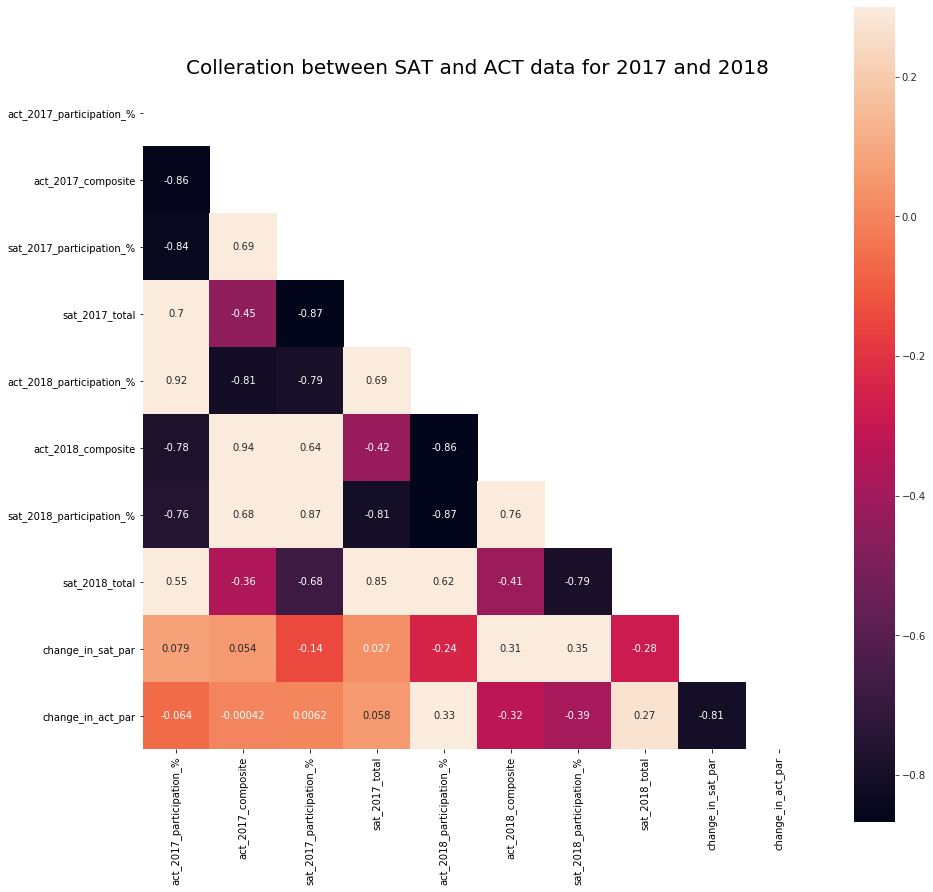

In [121]:
#Heatmap plot code
plt.figure(figsize=(15,15))
plt.title("Colleration between SAT and ACT data for 2017 and 2018",fontsize = 20)
corr =final[['act_2017_participation_%','act_2017_composite','sat_2017_participation_%','sat_2017_total','act_2018_participation_%','act_2018_composite','sat_2018_participation_%','sat_2018_total','change_in_sat_par','change_in_act_par']].corr()
mask = np.zeros_like(corr)
#Mask upper triangle
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
     sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

#### Observed Relationships from the Heatmap
--The SAT Participation is negatively correlated to the ACT Participation.

--The SAT/ACT Participation is negatively correlated to SAT/ACT test totals respectively.

--The SAT/ACT 2017 scores are positively correlated to the SAT/ACT 2018 scores respectively.

--The SAT/ACT 2017 participations are positively correlated to the SAT/ACT 2018 participations respectively.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [122]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles,xlabel):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(15,15)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],bins=20) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(xlabel,fontsize=15)
        ax[i].set_ylabel('State Count',fontsize=15)
        ax[i].set_title(f'{list_of_titles[i]}',fontsize=15)
        
        

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

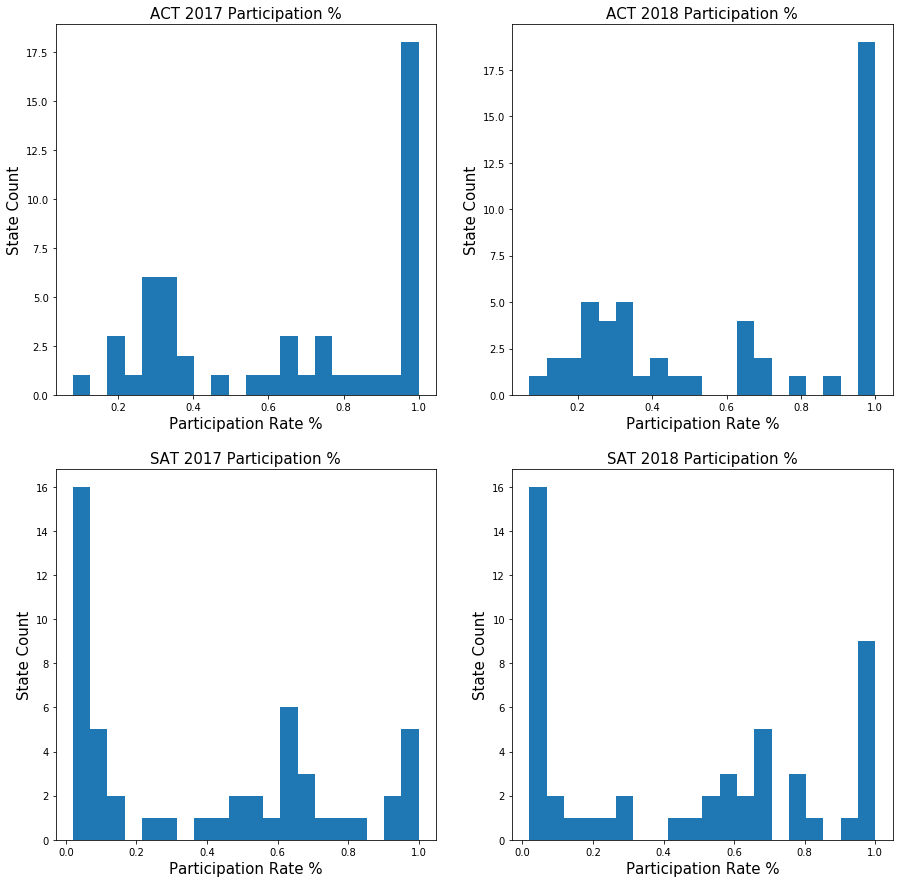

In [123]:
# Histograms of Participation rates for SAT & ACT
final_col=['act_2017_participation_%','act_2018_participation_%','sat_2017_participation_%','sat_2018_participation_%']
titles=['ACT 2017 Participation %','ACT 2018 Participation %','SAT 2017 Participation %','SAT 2018 Participation %']
subplot_histograms(final,final_col,titles,xlabel='Participation Rate %')

#### Interpretations 
- More states had 100% ACT participation than SAT participation
- 2018 SAT had more 100% Participation rates than 2017 SAT.

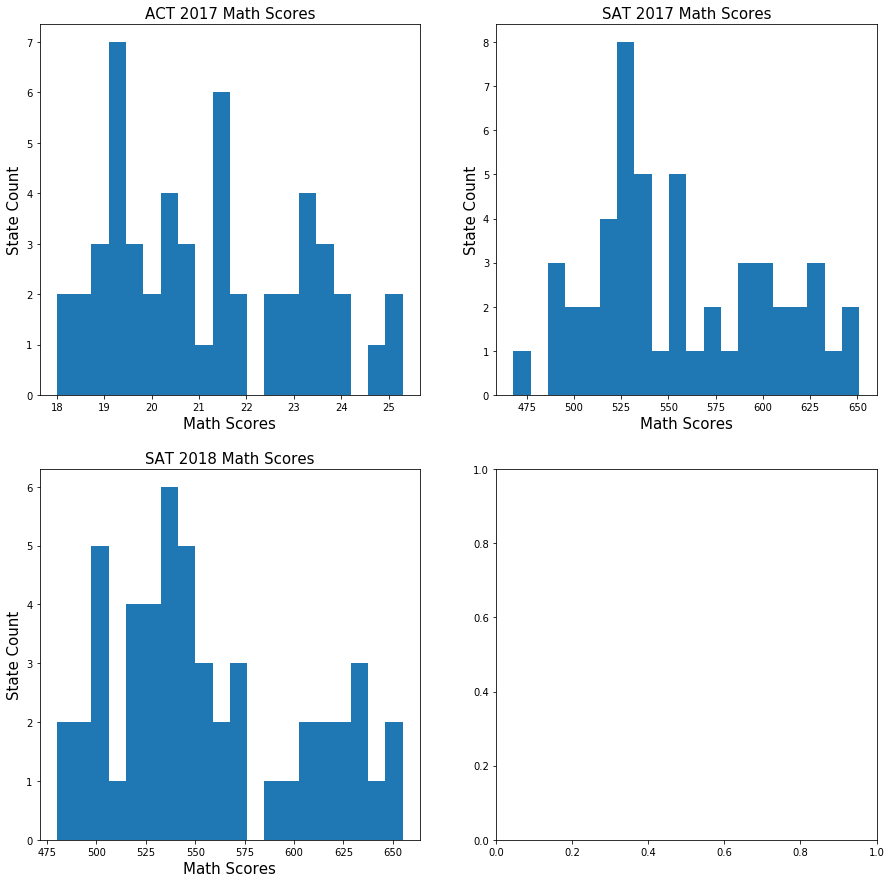

In [124]:
# Histograms of Math scores for SAT & ACT
final_col=['act_2017_math','sat_2017_math','sat_2018_math']
titles=['ACT 2017 Math Scores','SAT 2017 Math Scores','SAT 2018 Math Scores']
subplot_histograms(final,final_col,titles,xlabel='Math Scores')

#### Interpretations 
- More states scored between 525 and 550 in SAT 2017 than 2018.


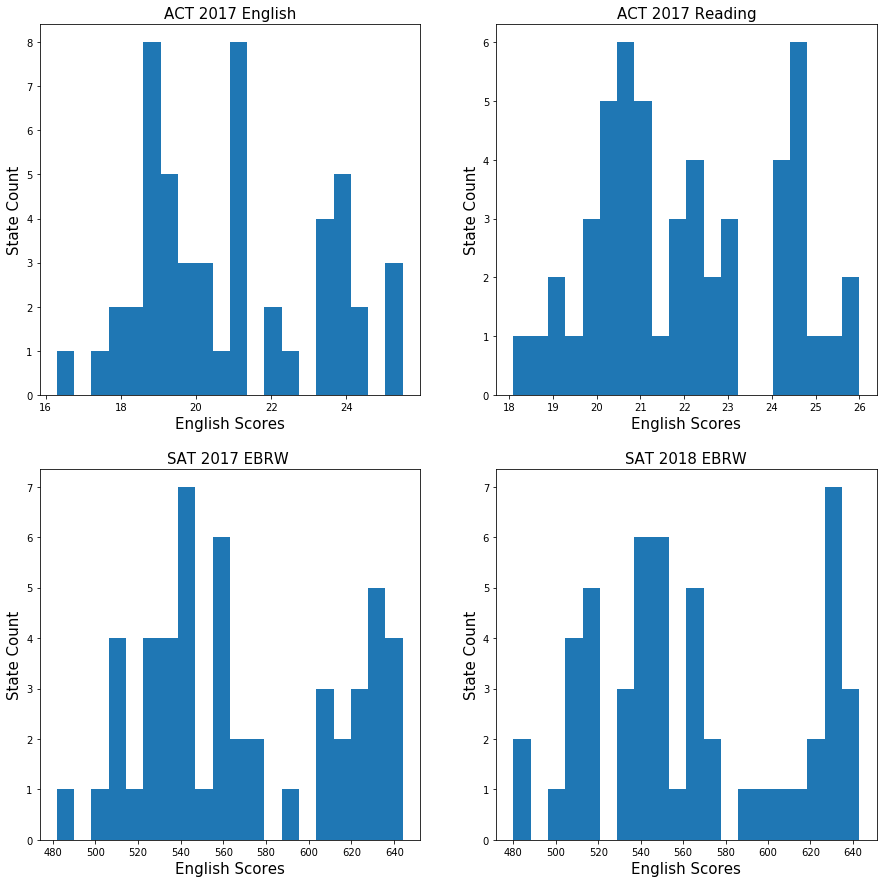

In [125]:
# Histograms of Reading/verbal scores for SAT & ACT
final_col=['act_2017_english','act_2017_reading','sat_2017_read_write','sat_2018_read_write']
titles=['ACT 2017 English','ACT 2017 Reading','SAT 2017 EBRW ','SAT 2018 EBRW']
subplot_histograms(final,final_col,titles,xlabel='English Scores')

#### Interpretations 
- The ACT 2017 English and Reading Score distribution vary significantly.
- More States reported scores around 650 in SAT 2018 EBRW than in SAT 2017

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [126]:
# Code
def scatterplot(df,x,y,x_label,y_label,title):
    plt.scatter(df[x],df[y])
    plt.title(title,fontsize=15)
    plt.xlabel(x_label,fontsize=10)
    plt.ylabel(y_label,fontsize=10)
    plt.figure(figsize=(20,20))

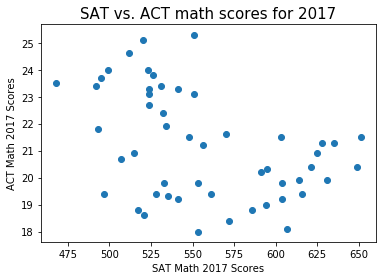

<Figure size 1440x1440 with 0 Axes>

In [127]:
#SAT vs. ACT math scores for 2017
scatterplot(final,'sat_2017_math','act_2017_math','SAT Math 2017 Scores','ACT Math 2017 Scores','SAT vs. ACT math scores for 2017')


#### Interpretations 
--The SAT Math 2017 scores have a weak negative correlation to the ACT Math 2017 scores

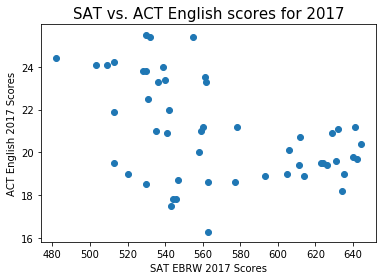

<Figure size 1440x1440 with 0 Axes>

In [128]:
#SAT vs. ACT English scores for 2017
scatterplot(final,'sat_2017_read_write','act_2017_english','SAT EBRW 2017 Scores','ACT English 2017 Scores','SAT vs. ACT English scores for 2017')

#### Interpretations 
--The SAT EBRW 2017 scores have a weak negative correlation to the ACT English 2017 scores

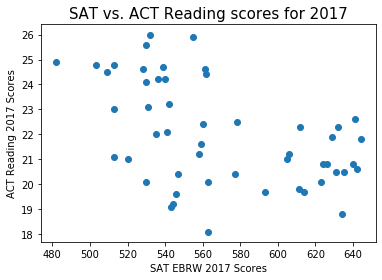

<Figure size 1440x1440 with 0 Axes>

In [129]:
#SAT vs. ACT Reading scores for 2017
scatterplot(final,'sat_2017_read_write','act_2017_reading','SAT EBRW 2017 Scores','ACT Reading 2017 Scores','SAT vs. ACT Reading scores for 2017')


#### Interpretations 
--The SAT EBRW 2017 scores have a weak negative correlation to the ACT Reading 2017 scores

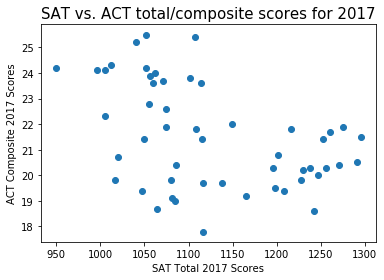

<Figure size 1440x1440 with 0 Axes>

In [130]:
#SAT vs. ACT total/composite scores for 2017
scatterplot(final,'sat_2017_total','act_2017_composite','SAT Total 2017 Scores','ACT Composite 2017 Scores','SAT vs. ACT total/composite scores for 2017')


#### Interpretations 
--The SAT Total 2017 scores have a weak negative correlation to the ACT Composite 2017 scores

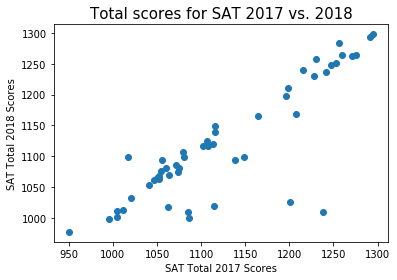

<Figure size 1440x1440 with 0 Axes>

In [131]:
#Total scores for SAT 2017 vs. 2018
scatterplot(final,'sat_2017_total','sat_2018_total','SAT Total 2017 Scores','SAT Total 2018 Scores','Total scores for SAT 2017 vs. 2018')

#### Interpretations 
--The SAT Total 2017 scores have a strong positive correlation to the SAT Total 2018 scores

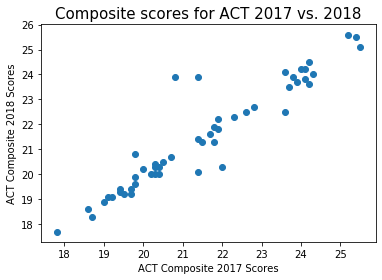

<Figure size 1440x1440 with 0 Axes>

In [132]:
#Composite scores for ACT 2017 vs. 2018
scatterplot(final,'act_2017_composite','act_2018_composite','ACT Composite 2017 Scores','ACT Composite 2018 Scores','Composite scores for ACT 2017 vs. 2018')

#### Interpretations 
--The ACT Composite 2017 scores have a strong positive correlation to the ACT Composite 2018 scores

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0, 0.5, 'Scores')

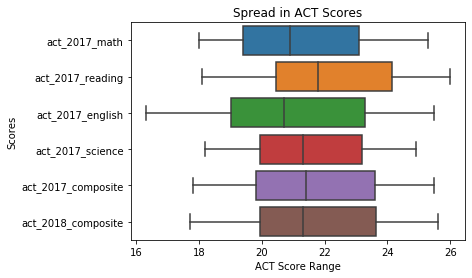

In [133]:
# Code
#Boxplot comparing ACT Scores (Scale 1-36)
sns.boxplot(data = final[["act_2017_math","act_2017_reading","act_2017_english","act_2017_science","act_2017_composite","act_2018_composite"]],orient = "h")
plt.title('Spread in ACT Scores')
plt.xlabel('ACT Score Range')
plt.ylabel('Scores')

#### Interpretations 
--ACT 2017 English Scores saw the highest score variability while ACT 2017 Science saw the least.

--ACT 2018 Composite Score saw higher variability than ACT 2017 and it's median score reduced compared to 2017 Composite score.

Text(0, 0.5, 'Scores')

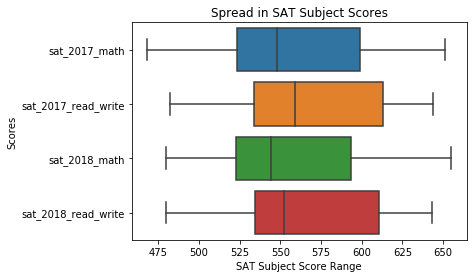

In [134]:
#Boxplot comparing SAT Subject Scores (Scale 200-800)
sns.boxplot(data = final[["sat_2017_math","sat_2017_read_write","sat_2018_math","sat_2018_read_write"]],orient = "h")
plt.title('Spread in SAT Subject Scores')
plt.xlabel('SAT Subject Score Range')
plt.ylabel('Scores')

#### Interpretations 
--SAT 2017 Math Score saw the highest variabilty among all the SAT Subject scores

--SAT 2018 Subject median scores shifted lower as compared to their 2018 counterparts

Text(0, 0.5, 'Scores')

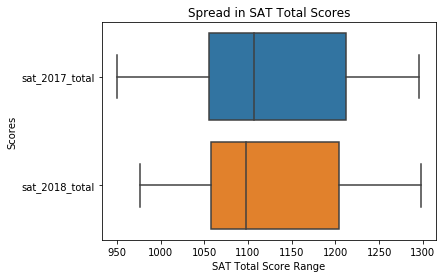

In [135]:
#Boxplot comparing SAT Total Scores(Scale 400-1600)
sns.boxplot(data = final[["sat_2017_total","sat_2018_total"]],orient = "h")
plt.title('Spread in SAT Total Scores')
plt.xlabel('SAT Total Score Range')
plt.ylabel('Scores')

#### Interpretations 
--SAT 2017 Total Scores had higher variability than 2018 Total Scores

--SAT 2018 Total median score was lower than 2017 Total median score

Text(0, 0.5, 'Participation Variable')

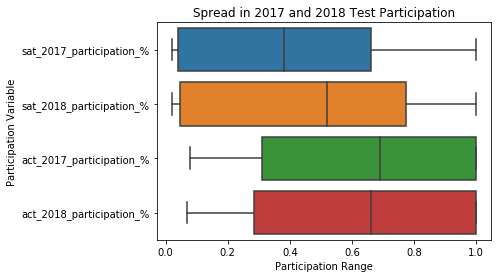

In [136]:
#Boxplot comparing SAT/ACT Participation (0-1)
sns.boxplot(data = final[["sat_2017_participation_%","sat_2018_participation_%","act_2017_participation_%","act_2018_participation_%"]],orient = "h")
plt.title('Spread in 2017 and 2018 Test Participation')
plt.xlabel('Participation Range')
plt.ylabel('Participation Variable')

#### Interpretations 
--ACT Tests had higher 100% Participation rates than SAT Tests

--SAT Tests saw increased participation rates from 2017 in 2018 and saw higher median score from 2017 in 2018

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

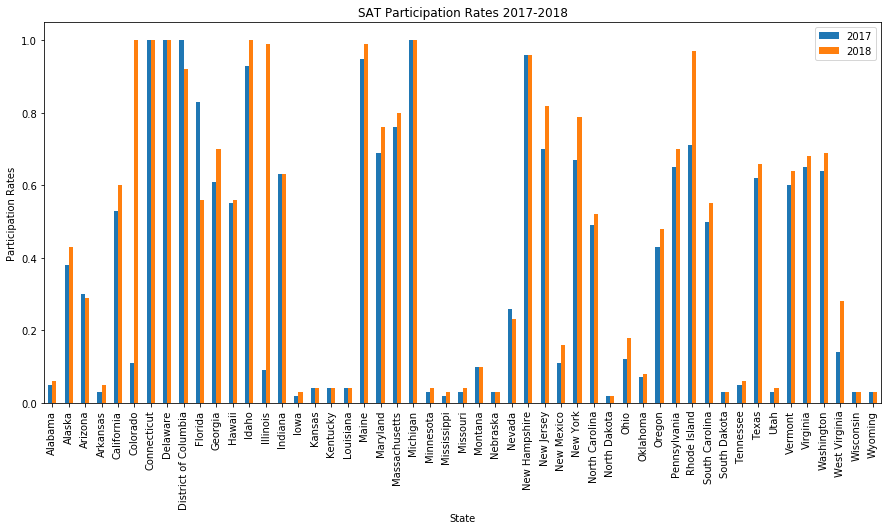

In [137]:
#Plot showing States SAT Test Participation
final.plot(x='state',y=['sat_2017_participation_%','sat_2018_participation_%'],kind='bar',figsize=(15,7),title='SAT Participation Rates 2017-2018')
plt.xlabel('State')
plt.ylabel('Participation Rates')
plt.legend((2017,2018))

#### Interpretations 
--Illinois,Colorado and Rhode Island saw significant increase in SAT Participation rates from 2017 to 2018
--SAT saw particularly lower rates in the southern states like Alabama,Arkansas, Louisiana, Mississippi

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [138]:
#ACT 2017 Participation Descriptive Statistics
print(final[['act_2017_participation_%']].median())
print(final[['act_2017_participation_%']].mean())
print(final[['act_2017_participation_%']].mode())

act_2017_participation_%    0.69
dtype: float64
act_2017_participation_%    0.652549
dtype: float64
   act_2017_participation_%
0                       1.0


Based on the histogram and descriptic statistics, the ACT 2017 participation data distribution is not normal and is skewed to the left 

In [139]:
#ACT 2018 Participation Descriptive Statistics
print(final[['act_2018_participation_%']].median())
print(final[['act_2018_participation_%']].mean())
print(final[['act_2018_participation_%']].mode())

act_2018_participation_%    0.66
dtype: float64
act_2018_participation_%    0.617255
dtype: float64
   act_2018_participation_%
0                       1.0


Based on the histogram and descriptic statistics, the ACT 2018 participation data distibution is not normal is skewed to the left 

In [140]:
#SAT 2017 Participation Descriptive Statistics
print(final[['sat_2017_participation_%']].median())
print(final[['sat_2017_participation_%']].mean())
print(final[['sat_2017_participation_%']].mode())

sat_2017_participation_%    0.38
dtype: float64
sat_2017_participation_%    0.398039
dtype: float64
   sat_2017_participation_%
0                      0.03


Based on the histogram and descriptic statistics, the SAT 2017 participation data is not normal,skewed to the right 

In [141]:
#SAT 2018 Participation Descriptive Statistics
print(final[['sat_2018_participation_%']].median())
print(final[['sat_2018_participation_%']].mean())
print(final[['sat_2018_participation_%']].mode())

sat_2018_participation_%    0.52
dtype: float64
sat_2018_participation_%    0.457451
dtype: float64
   sat_2018_participation_%
0                      0.03
1                      0.04


Based on the histogram and descriptic statistics, the SAT 2018 participation data is not normal,bimodal,skewed to the right 

In [142]:
#ACT 2017 Composite Descriptive Statistics
print(final[['act_2017_composite']].mean())
print(final[['act_2017_composite']].median())
print(final[['act_2017_composite']].mode())

act_2017_composite    21.519608
dtype: float64
act_2017_composite    21.4
dtype: float64
   act_2017_composite
0                19.8
1                20.3
2                21.4


Based on the histogram and descriptic statistics, the ACT 2017 composite data is not normal and is trimodal 

In [143]:
#ACT 2018 Composite Descriptive Statistics
print(final[['act_2018_composite']].mean())
print(final[['act_2018_composite']].median())
print(final[['act_2018_composite']].mode())

act_2018_composite    21.496078
dtype: float64
act_2018_composite    21.3
dtype: float64
   act_2018_composite
0                20.0
1                20.3
2                23.9


Based on the histogram and descriptic statistics, the ACT 2018 composite data is not normal and is trimodal 

In [144]:
#SAT 2017 Total Descriptive Statistics
print(final[['sat_2017_total']].mean())
print(final[['sat_2017_total']].median())
print(final[['sat_2017_total']].mode())

sat_2017_total    1126.098039
dtype: float64
sat_2017_total    1107.0
dtype: float64
   sat_2017_total
0            1005
1            1052
2            1116


Based on the histogram and descriptic statistics, the SAT 2017 Total data is not normal and is trimodal

In [145]:
#SAT 2018 Total Descriptive Statistics
print(final[['sat_2018_total']].mean())
print(final[['sat_2018_total']].median())
print(final[['sat_2018_total']].mode())

sat_2018_total    1120.019608
dtype: float64
sat_2018_total    1098.0
dtype: float64
   sat_2018_total
0            1010
1            1099
2            1117
3            1265


Based on the histogram and descriptic statistics, the SAT 2018 Total data is not normal and has 4 modes

In [146]:
#ACT 2017 Math Descriptive Statistics
print(final[['act_2017_math']].mean())
print(final[['act_2017_math']].median())
print(final[['act_2017_math']].mode())

act_2017_math    21.182353
dtype: float64
act_2017_math    20.9
dtype: float64
   act_2017_math
0           19.4


Based on the histogram and descriptic statistics, the ACT 2017 math data is not normal.

In [147]:
#ACT 2017 Science Descriptive Statistics
print(final[['act_2017_science']].mean())
print(final[['act_2017_science']].median())
print(final[['act_2017_science']].mode())

act_2017_science    21.462745
dtype: float64
act_2017_science    21.3
dtype: float64
   act_2017_science
0              20.5
1              20.6
2              20.9
3              22.0


Based on the histogram and descriptic statistics, the ACT 2017 science data is not normal and has 4 modes.

In [148]:
#ACT 2017 English Descriptive Statistics
print(final[['act_2017_english']].mean())
print(final[['act_2017_english']].median())
print(final[['act_2017_english']].mode())

act_2017_english    20.931373
dtype: float64
act_2017_english    20.7
dtype: float64
   act_2017_english
0              19.0
1              19.5
2              21.2


Based on the histogram and descriptic statistics, the ACT 2017 english data is not normal and has 3 modes.

In [149]:
#ACT 2017 Reading Descriptive Statistics
print(final[['act_2017_reading']].mean())
print(final[['act_2017_reading']].median())
print(final[['act_2017_reading']].mode())

act_2017_reading    22.013725
dtype: float64
act_2017_reading    21.8
dtype: float64
   act_2017_reading
0              20.1
1              20.8


Based on the histogram and descriptic statistics, the ACT 2017 reading data is not normal and has 2 modes.

In [150]:
#SAT 2017 EBRW Descriptive Statistics
print(final[['sat_2017_read_write']].mean())
print(final[['sat_2017_read_write']].median())
print(final[['sat_2017_read_write']].mode())

sat_2017_read_write    569.117647
dtype: float64
sat_2017_read_write    559.0
dtype: float64
   sat_2017_read_write
0                  513
1                  530


Based on the histogram and descriptic statistics, the SAT 2017 EBRW data is not normal and has 2 modes.

In [151]:
#SAT 2018 EBRW Descriptive Statistics
print(final[['sat_2018_read_write']].mean())
print(final[['sat_2018_read_write']].median())
print(final[['sat_2018_read_write']].mode())

sat_2018_read_write    563.686275
dtype: float64
sat_2018_read_write    552.0
dtype: float64
   sat_2018_read_write
0                  513
1                  547
2                  633


Based on the histogram and descriptic statistics, the SAT 2018 EBRW math data is not normal and has 3 modes.

In [152]:
#SAT 2017 Math Descriptive Statistics
print(final[['sat_2017_read_write']].mean())
print(final[['sat_2017_read_write']].median())
print(final[['sat_2017_read_write']].mode())

sat_2017_read_write    569.117647
dtype: float64
sat_2017_read_write    559.0
dtype: float64
   sat_2017_read_write
0                  513
1                  530


Based on the histogram and descriptic statistics, the SAT 2017 math data is not normal and has 2 modes.

In [153]:
#SAT 2018 Math Descriptive Statistics
print(final[['sat_2018_math']].mean())
print(final[['sat_2018_math']].median())
print(final[['sat_2018_math']].mode())

sat_2018_math    556.235294
dtype: float64
sat_2018_math    544.0
dtype: float64
   sat_2018_math
0            506
1            530
2            547
3            618
4            631


Based on the histogram and descriptic statistics, the SAT 2018 math data is not normal and has 5 modes.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No, from the sample derived the normal distridution trend isn't observed.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: The assumptions hold for math, reading and participation rates.Calculations based on estimations of normality cannot be done.Calculations like Confidence intervals are only used assuming normality.
A larger sample size should be investigated.


#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Statistical Inference could only be conducted on the states' data where the SAT participation equals to the ACT participation.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

No, it is not appropriate to compare the SAT and ACT math scores. SAT and ACT are two completely different tests with different ranges and scaling systems. I am assuming the score weightage system (weight of each question based on complexity) would also vary. In addition,as depicted in the heat map, the higher average test scores per state are negatively correlated to lower participation rates.This would have to be considered in our assumptions.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [154]:
final[mask_2017_50|mask_2018_50][['state','act_2017_participation_%','act_2018_participation_%','change_in_act_par','sat_2017_participation_%','sat_2018_participation_%','change_in_sat_par']].sort_values('change_in_sat_par',ascending=False).head(4)

,state,act_2017_participation_%,act_2018_participation_%,change_in_act_par,sat_2017_participation_%,sat_2018_participation_%,change_in_sat_par
13,Illinois,0.93,0.43,-0.50,0.09,0.99,0.90
5,Colorado,1.00,0.30,-0.70,0.11,1.00,0.89
39,Rhode Island,0.21,0.15,-0.06,0.71,0.97,0.26
48,West Virginia,0.69,0.65,-0.04,0.14,0.28,0.14


From my observations, I found that Illinois, Colorado and West Virginia had interesting SAT Participation rate outcomes between 2017 and 2018.

Upon further research into those states' testing policies, I came across the following articles:

**Colorado**

https://www.testive.com/colorado-sat-change-2017/

In 2017,Colorado made the SAT test mandatory for all high school juniors to be eligible for admission into any Colorado state university. All SAT fees would be covered as well.

**Illinois**

https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html

College Board won a $14.3 Million bid to bring the SAT to public schools in Illinois.

**West Virginia**

https://www.wsaz.com/content/news/All-WVa-high-school-juniors-to-begin-taking-SAT-exam-beginning-Spring-2018-444248263.html#:~:text=The%20West%20Virginia%20Department%20of,old%20standardized%20test%2C%20Smarter%20Balanced.

West Virginia recently retired their old standard test and is slowly picking put the pace to mandate SAT tests across the state.

These developments would explain the changes in Participation rates in the states listed above.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [162]:
#Oklahoma Statistics
final.iloc[36]

state                       Oklahoma
act_2017_participation_%           1
act_2017_english                18.5
act_2017_math                   18.8
act_2017_reading                20.1
act_2017_science                19.6
act_2017_composite              19.4
sat_2017_participation_%        0.07
sat_2017_read_write              530
sat_2017_math                    517
sat_2017_total                  1047
act_2018_participation_%           1
act_2018_composite              19.3
sat_2018_participation_%        0.08
sat_2018_read_write              541
sat_2018_math                    521
sat_2018_total                  1062
change_in_sat_par               0.01
change_in_act_par                  0
Name: 36, dtype: object

The SAT test is gaining popularity among many states across USA. However, the ACT still poses strong competition having 100% participation rates in many states. States like Oklahoma have consistant low SAT participaion rates for both 2017 and 2018.Some recommendations to boost participation rates would be: Working with state school boards to reduce or eliminate fees, preliminary testing and tutoring focus on SAT test taking and focus efforts on improving  test access to minory communities.Additional data from each state based on demographics would help develop state specific participation improvement plans.